<a href="https://colab.research.google.com/github/odarasimi/Mnist_predict/blob/master/Mnist_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras import optimizers
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense, Dropout,Flatten
from keras.layers import MaxPooling2D

In [10]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train[0].shape

(28, 28)

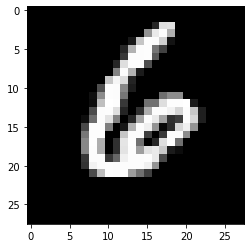

In [13]:
img = x_train[13]
plt.imshow(img, cmap="gray",interpolation="nearest")

In [14]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train = x_train.astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test = x_test.astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
print (x_test.shape,y_test.shape)

(10000, 28, 28, 1) (10000, 10)


In [16]:
model = Sequential()
 
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
 
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(2,2))
 
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(2,2))
 
model.add(Flatten())
 
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.4))
 
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
 
model.add(Dense(10, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [17]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=50,epochs=20,verbose=1)
predictions = model.evaluate(x_test,y_test)

Epoch 1/20
1200/1200 [==============================] - 44s 36ms/step - loss: 0.3775 - accuracy: 0.8793
Epoch 2/20
1200/1200 [==============================] - 43s 36ms/step - loss: 0.1218 - accuracy: 0.9652
Epoch 3/20
1200/1200 [==============================] - 44s 36ms/step - loss: 0.0904 - accuracy: 0.9744
Epoch 4/20
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0714 - accuracy: 0.9804
Epoch 5/20
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0604 - accuracy: 0.9833
Epoch 6/20
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0526 - accuracy: 0.9856
Epoch 7/20
1200/1200 [==============================] - 49s 41ms/step - loss: 0.0453 - accuracy: 0.9871
Epoch 8/20
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0398 - accuracy: 0.9885
Epoch 9/20
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0348 - accuracy: 0.9897
Epoch 10/20
1200/1200 [==============================] - 43s 36m

**Test**

In [18]:
predictions = model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0359 - accuracy: 0.9929
